---
bibliography:
  - bibliography.bib
---

# Multiple Linear Regression

### Example Multiple Linear Regression 1.3
Until now, we have considered only one predictor in the **Income** data set: years of **education**. However the income depends obviously as well on the years of **experience**.

Thus, we have the following multiple regression model
\begin{equation*}
\text{income}
=\beta_{0}+\beta_{1}\cdot \text{education} + \beta_{2}\cdot\text{experience} + \epsilon
\end{equation*}

Since we only have two predictors, the data points can be visualized in a 3D plot.

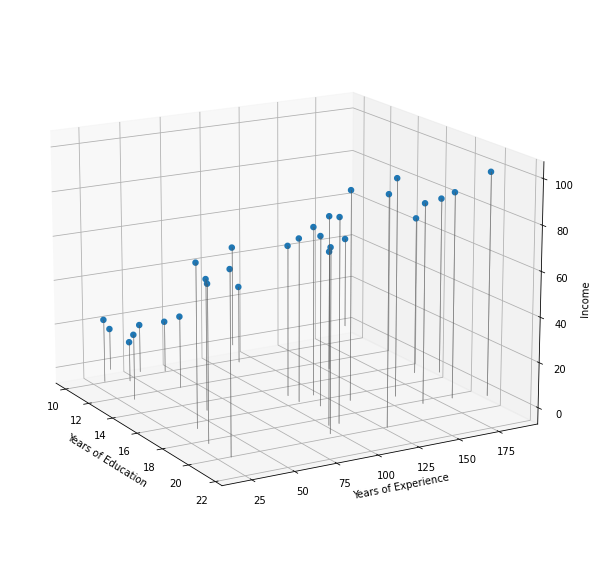

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Multiple Linear Regression/data/Income2.csv')
x = df['education']
y = df['experience']
z = df['income']

# Create Figure and plot
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection="3d")

# Barplot creating vertical lines
dx, dy = 0.05, 0.05    # dx = dy, dimensions of bar 
dz = z                 # dz = heigth of bar
ax.bar3d(x, y, [0],    # Position of base
         dx, dy, dz,   # bar Dimensions
         color='grey', alpha=0.5, 
         linestyle='-')

# 3D scatterplot
ax.scatter(x, y, z, alpha=1, linewidth=2)
ax.view_init(elev=16., azim=-30)

# Set titles
ax.set_xlabel('Years of Education')
ax.set_ylabel('Years of Experience')
ax.set_zlabel('Income')

# Show plot
plt.tight_layout()
plt.show()

Contrary to the simple linear regression model, in a three-dimensional setting, with two predictors and one response, the least squares regression line becomes a *plane* which fits best the data points.   

The plane is chosen to minimize the sum of the squared vertical distances between each observation and the plane. These vertical distances correspond to the residuals. The figure displays  blue segments for points that lie above the plane, and red segments for points that lie below the plane. 

The parameters are estimated using the same least squares approach that we saw in the context of simple linear regression. With the **.params** attribute of a fitted model we can determine the regression coefficients  $ \beta_{0},\beta_{1} $ and $ \beta_{2} $ for the **Income** data set: 

\begin{equation*}
\hat{\beta}_{0}=-50.086;\qquad
\hat{\beta}_{1}=5.896;\qquad
\hat{\beta}_{2}=0.173
\end{equation*}


In [2]:
import statsmodels.api as sm

# Fit Linear Model
x_sm = df[['education', 'experience']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(z, x_sm).fit()

# Print Model Parameters
print(model.params)

const        -50.085639
education      5.895556
experience     0.172855
dtype: float64


### Example Multiple Linear Regression 2.1

In **Python** we estimate the coefficients for the linear regression model of example 1.2 for the **Advertising** data set, as follows

In [2]:
import pandas as pd
import statsmodels.api as sm

# Load data
df = pd.read_csv('Multiple Linear Regression/data/Advertising.csv')
x = df[['TV', 'radio', 'newspaper']]
y = df['sales']

# Fit Model:
x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()

# Print Model parameters
print(model.params)

const        2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64


As we have seen, the regression coefficient estimates seem to be very different for some of the predictors with regard to the linear regression. In order to investigate this, we check how the predictors are correlated, using the DataFrame.corr() method.

In [3]:
# Save the Sales data in a fitting dataframe:
df = df[['TV', 'radio', 'newspaper', 'sales']]
 
# Print the correlation coefficients
print(df.corr())

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


In [4]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           1.58e-96
Time:                        08:36:34   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Example Multiple Linear Regression 3.1

The $ F $-statistic for the multiple linear regression model in the **Advertising** example is obtained by regressing **sales** 
onto **radio**, **TV**, and **newspaper** and is in this example 570. 
In the **Python**-output we find the value of the $ F $-statistic under **F-statistic**. 

In [1]:
import pandas as pd
import statsmodels.api as sm

# Load data
df = pd.read_csv('Multiple Linear Regression/data/Advertising.csv')
x = df[['TV', 'radio', 'newspaper']]
y = df['sales']

# Fit Model:
x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()

# Print summary including F-Statistic
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           1.58e-96
Time:                        17:24:49   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

Since this is far larger than 1, it provides compelling evidence against the null hypothesis $ H_{0} $. In other words, the large $ F $-statistic suggests that at least one of the advertising media must be related to **sales**. 

In [2]:
model.mse_resid

2.8409452188887103

In [4]:
import numpy as np
np.sqrt(model.mse_resid)

1.685510373414744

### Example Multiple Linear Regression 3.5

We use a *confidence interval* to quantify the uncertainty surrounding the *average* **sales** over a large number of cities. We restrict ourselves to the regression of **sales** on **TV** and **radio** since **newspaper** can be neglected as followed from the previous discussion. 

For example, given that CHF 100000 is spent on **TV** advertising and CHF 20000 is spent on **radio** advertising in each city, the $95\%$ confidence interval is 
\begin{equation*}
[10'985,11'528]
\end{equation*}

In [2]:
import pandas as pd
import statsmodels.api as sm

# Load data
df = pd.read_csv('Multiple Linear Regression/data/Advertising.csv')
x = df[['TV', 'radio']]
y = df['sales']

# Fit Model:
x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()

# Get prediction and confidence interval at x = [100, 20]
x0 = [[100, 20]]
x0 = sm.add_constant(x0, has_constant='add')

predictionsx0 = model.get_prediction(x0)
predictionsx0 = predictionsx0.summary_frame(alpha=0.05)

# Print the results. mean_ci_ corresponds to the confidence interval
# whereas obs_ci corresponds to the prediction interval
print(predictionsx0)


        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  11.256466  0.137526      10.985254      11.527677      7.929616   

   obs_ci_upper  
0     14.583316  


We interpret this to mean that $95\%$ of intervals of this form will contain the true value of $ f(X_{1},X_{2}) $ . In other words, if we collect a large number of data sets like the **Advertising** data set, and we construct a confidence interval for the average **sales** on the basis of each data set - given CHF 100000 in **TV** and CHF 20000 in **radio** advertising - then $95\%$ of these confidence intervals will contain the true value of average **sales**. 

On the other hand, a *prediction interval* can be used to quantify the uncertainty surrounding **sales** for a *particular* city. Given that CHF 100000 is spent on **TV** and CHF 20000 is spent on **radio** advertising in that city the $95\%$ *prediction interval* is

\begin{equation*}
[7'930,14'583]
\end{equation*}

We interpret this to mean that $95\%$ of intervals of this form will contain the true value of $ Y $ for this city. 

Note that both intervals are centered at 11256, but that the prediction interval is substantially wider than the confidence interval, reflecting the increased uncertainty about **sales** for a given city in comparison to the average **sales** over many locations.



### Example Multiple Linear Regression 4.1

For the **Advertising** data we had the following multiple linear regression model
\begin{equation}
sales
=\beta_{0}+\beta_{1}\cdot TV+\beta_{2}\cdot radio +\beta_{3}\cdot newspaper + \epsilon
\end{equation}
For instance, as we discussed earlier, the p-values associated with this model indicate that **TV** and 
**radio** are related to **sales**, but that there is no evidence that 
**newspaper** is associated with **sales**, in the presence of these two.

We now compare the **large** model $ \mathcal{M}_{2} $ 
defined by the equation above with the **small** model 
$ \mathcal{M}_{1} $ (without **newspaper**)
\begin{equation*}
sales
=\beta_{0}+\beta_{1}\cdot TV+\beta_{2}\cdot radio + \epsilon
\end{equation*} 

We use the **anova\_lm()** method function, which performs an *analysis of variance* (ANOVA, using an F-test) in order to test the null hypothesis that the small model $ \mathcal{M}_{1} $ is sufficient to explain the data against the alternative hypothesis that the (more complex) model $ \mathcal{M}_{2} $ is required. In order to use the **anova()** function, $ \mathcal{M}_{1} $ and $ \mathcal{M}_{2} $ must be *nested* models: the predictors in $ \mathcal{M}_{1} $ must be a subset of the predictors in $ \mathcal{M}_{2} $.  This corresponds to the null hypothesis $ \beta_{3}=0 $, that is, that there is no relationship between **newspaper** and **sales**.


The **Python**-output provides us with the information that the residual sum of squares (**RSS**) in the **small** model is given by
\begin{equation*}
\text{RSS}_{0}= 556.91\\
\end{equation*}

whereas the residual sum of squares for the **large** model $ \mathcal{M}_{2} $ 
is
\begin{equation*}
\text{RSS}= 556.83
\end{equation*}


In [2]:
import pandas as pd
import statsmodels.api as sm

# Load data
df = pd.read_csv('Multiple Linear Regression/data/Advertising.csv')
x1 = df[['TV', 'radio']]
x2 = df[['TV', 'radio', 'newspaper']]
y = df['sales']

# Fit model
x1_sm = sm.add_constant(x1)
x2_sm = sm.add_constant(x2)
model1 = sm.OLS(y, x1_sm).fit()
model2 = sm.OLS(y, x2_sm).fit()

# Table and print results
table = sm.stats.anova_lm(model1, model2)
print(table)

   df_resid         ssr  df_diff   ss_diff         F    Pr(>F)
0     197.0  556.913980      0.0       NaN       NaN       NaN
1     196.0  556.825263      1.0  0.088717  0.031228  0.859915


The difference between $\text{RSS}$ and $\text{RSS}_{0}$ can be found in the **Python**-output under **ss\_diff**  and is  $0.088717$. The value of $q$ is displayed under $Df$ and is given here by $1$. For the **large** model, we have
\begin{equation*}
n-p-1=200-3-1=196
\end{equation*}
degrees of freedom (**df\_resid**), contrary to the **small** model that has 
\begin{equation*}
n-p-1=200-2-1=197
\end{equation*}
degrees of freedom. Thus, the value of the F-statistic is (**F**)
\begin{align*}
F
&=\dfrac{(\text{RSS}_{0}-\text{RSS})/q}{\text{RSS}/(n-p-1)}\\
&=\frac{(556.91-556.83)/1}{556.83/(200-3-1)}\\
&=\frac{0.088717}{556.83/196}\\
&=0.0312
\end{align*}

The one-sided p-value in upwards direction for the $ F $-statistic assuming the null hypothesis is true, that is $\beta_3=0$, is displayed in the **Python**-output under **Pr($>$F)** : 0.8599. 

Since this p-value is significantly larger than the significance level $\alpha=0.05$, there is no evidence to reject the null hypothesis. We conclude that the predictor  **newspaper** is redundant, and we therefore can omit it. 

### Example Multiple Linear Regression 4.3

If we compare the **large** model $\mathcal{M}_{2}$ with the **small** model (**TV** is omitted) $ \mathcal{M}_{1} $
\begin{equation*}
sales
=\beta_{0}+\beta_{1}\cdot radio +\beta_{2}\cdot newspaper+\epsilon
\end{equation*}
then we come to a very different conclusion:


In [3]:
# Load data
x3 = df[['radio', 'newspaper']]

# Fit model
x3_sm = sm.add_constant(x3)
model3  = sm.OLS(y, x3_sm).fit()

# Table and print results
table = sm.stats.anova_lm(model3, model2)
print(table)


   df_resid          ssr  df_diff      ss_diff            F        Pr(>F)
0     197.0  3614.835279      0.0          NaN          NaN           NaN
1     196.0   556.825263      1.0  3058.010016  1076.405837  1.509960e-81


In this case the p-value is approximately zero, hence we have to reject the null hypothesis $ \beta_{1}=0 $. There is a significant difference in how well the two models $ \mathcal{M}_{1} $ and $ \mathcal{M}_{2} $ fit the data. Omitting **TV** leads to a model that shows a significant deterioration with respect to the quality of the model.
 
In order to get an "overview" about how the quality of a model changes when one predictor variable is omitted, we can use the **anova\_lm()** method on the one model only. However, this only works, when the model is defined using a formula instead of columns of data.    

In [4]:
import statsmodels.formula.api as smf

# Load data
TV = df[['TV']]
radio = df[['radio']]
newspaper = df[['newspaper']]
sales = df['sales']

# Fit model using formula:
model_f = smf.ols(formula='sales ~ TV + radio + newspaper', data=df).fit()

# Table and print results
table_f = sm.stats.anova_lm(model_f, typ=2)
print(table_f)

                sum_sq     df            F        PR(>F)
TV         3058.010016    1.0  1076.405837  1.509960e-81
radio      1361.736549    1.0   479.325170  1.505339e-54
newspaper     0.088717    1.0     0.031228  8.599151e-01
Residual    556.825263  196.0          NaN           NaN


### Example Multiple Linear Regression 4.4

For example, the **Credit** data set records **balance** (average credit card debt for a number of individuals) as well as several quantitative predictors: **age**, **cards** (number of credit cards), **education** (years of education), **income** (in thousand of dollars), **limit** (credit limit), and **rating** (credit rating). 

Each panel of the Figure is a scatterplot for a pair of variables whose identities are given by the corresponding row and column labels. For example, the scatterplot directly to the right of the word **Balance** depicts **balance** versus **age**, while the plot directly to the right of **Age** corresponds to **age** versus **cards**. 

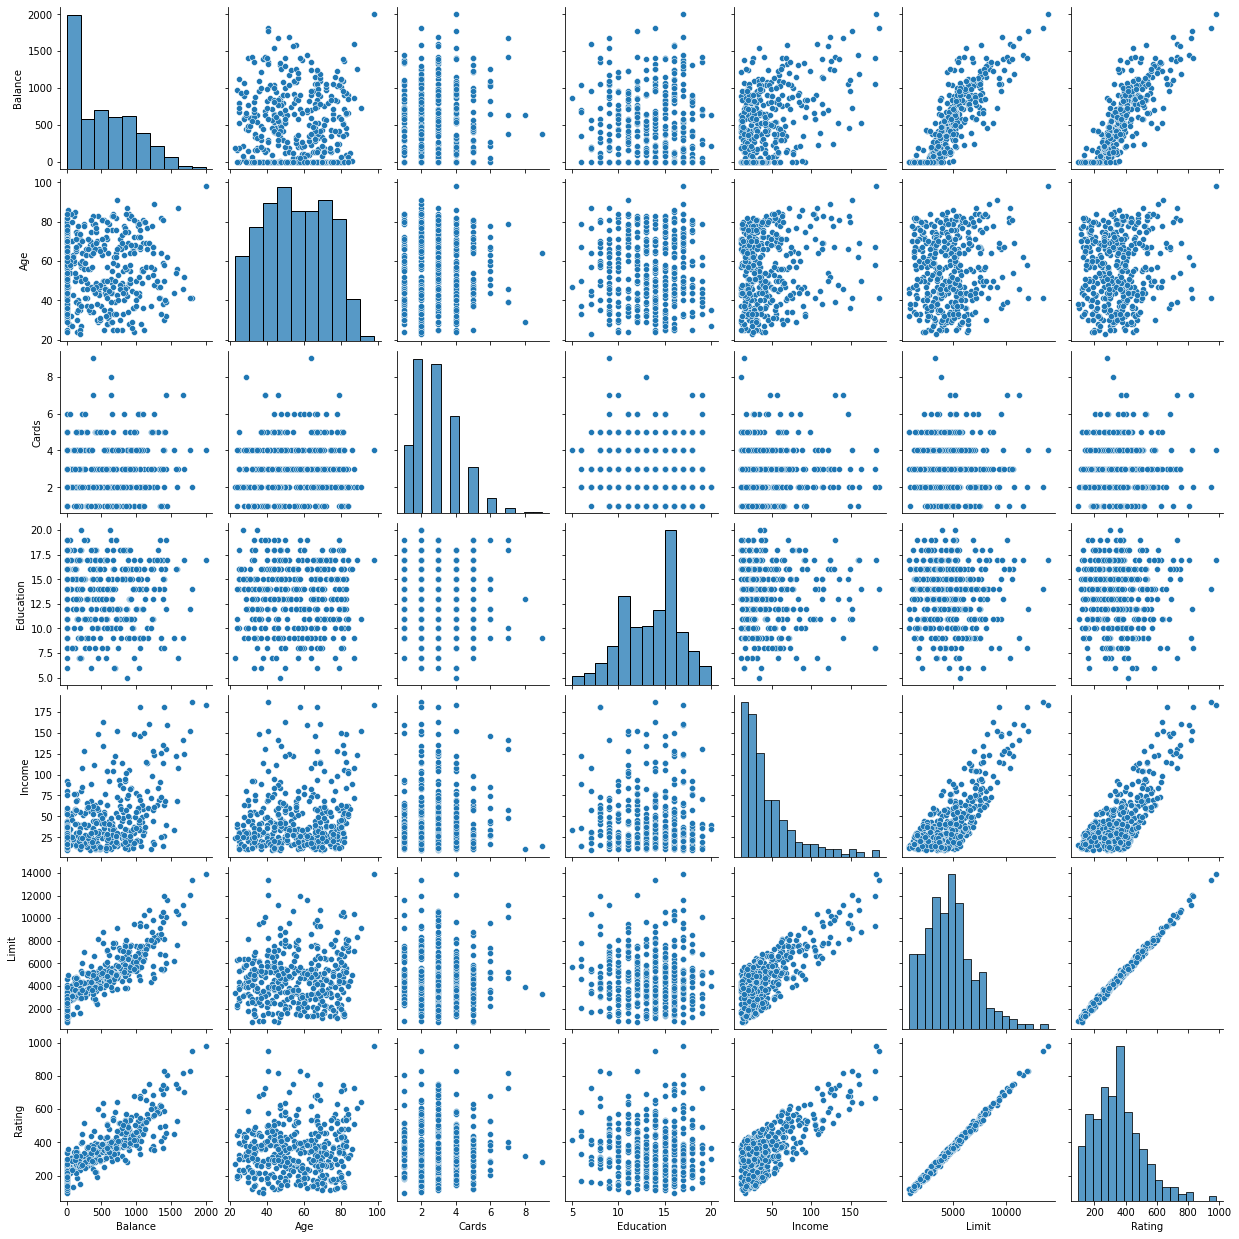

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Multiple Linear Regression/data/Credit.csv')

# Drop Qualitative terms / take only quantitave terms
df = df[['Balance', 'Age', 'Cards', 'Education', 
         'Income', 'Limit', 'Rating']]

# Plot using sns.pairplot
sns.pairplot(df)
plt.show()

In addition to these quantitative variables, we also have four qualitative variables : **gender**, **student** (student status), **status** (marital status) and **ethnicity** (Caucasian, African American or Asian). 

### Example Multiple Linear Regression 4.5

For example, based on the **gender** variable, we can create a new variable that takes the form
\begin{equation*}
x_{i}
=
\begin{cases}
1&\text{if $ i $th person is female}\\
0&\text{if $ i $th person is male}
\end{cases}
\end{equation*}

and use this variable as a predictor in the regression equation. This results in the model
\begin{equation}\label{eq:regr_dummy_credit}
y_{i}
=\beta_{0}+\beta_{1}x_{i}+\epsilon_{i}
=
\begin{cases}
\beta_{0}+\beta_{1}+\epsilon_{i}&\text{if $ i $th person is female}\\
\beta_{0}+\epsilon_{1}&\text{if $ i $th person is male}
\end{cases}
\end{equation}

Now, $ \beta_{0} $ can be interpreted as the average credit card balance among males, $\beta_{0} + \beta_{1} $ as the average credit card balance among females, and $ \beta_{1} $ as the average difference in credit card balance between females and males. 

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load data
df = pd.read_csv('Multiple Linear Regression/data/Credit.csv')

balance = df['Balance']

# Initiate dummy variable with zeros:
gender = np.zeros(len(balance))
# Make 1 for Female:
indices_Fem = df[df['Gender']=='Female'].index.values
gender[indices_Fem] = 1

# Fit model
gender_sm = sm.add_constant(gender)
model = sm.OLS(balance, gender_sm).fit()

# Print summary:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Fri, 11 Mar 2022   Prob (F-statistic):              0.669
Time:                        18:05:36   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        509.8031     33.128     15.389      0.0

The **.summary()** method of a fitted model shows the encoding of the *dummy variable* associated with **gender**. The average credit card debt for males is estimated to be $509.80$, whereas females are estimated to carry 19.73 in additional debt for a total of  $ \;509.80+ \; 19.73 = \;529.53 $. 

However, we notice that the p-value for the dummy variable $ \beta_{1} $ is $ 0.6690 $, hence it is very high. This indicates that there is no statistical evidence of a difference in average credit card balance between the genders. 

### Example Multiple Linear Regression 4.6
If we had coded males as 1 and females as 0, then the estimates for $ \beta_{0} $ and $ \beta_{1} $ would have been 529.53 and -19.73 respectively, leading once again to a prediction of credit card debt of $\;529.73- \;19.73= \; 509.80 $ for males and a prediction of 529.53 for females. This is the same result we obtained with the **default** coding scheme.

If we wish to change the coding scheme for the dummy variable, we can change it in **Python** by changing the coding scheme.

In [3]:
# Following Example 4.5
# Initiate dummy variable with zeros:
gender = np.zeros(len(balance))
# Make 1 for Male:
indices_Mal = df[df['Gender'] == 'Male'].index.values
gender[indices_Mal] = 1

# Fit model
gender_sm = sm.add_constant(gender)
model = sm.OLS(balance, gender_sm).fit()

# Print summary:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 11 Mar 2022   Prob (F-statistic):                nan
Time:                        18:05:36   Log-Likelihood:                -3019.4
No. Observations:                 400   AIC:                             6041.
Df Residuals:                     399   BIC:                             6045.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        520.0150     22.988     22.621      0.0

/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


### Example Multiple Linear Regression 4.7
Alternatively, instead of a $ 0/1 $ coding scheme, we could create a dummy variable 
\begin{equation*}
x_{i}
=
\begin{cases}
1&\text{if $ i $th person is female}\\
-1&\text{if $ i $th person is male}
\end{cases}
\end{equation*}

and use this variable in the regression equation. This results in the model
\begin{equation*}
y_{i}
=\beta_{0}+\beta_{1}x_{i}+\epsilon_{i}
=
\begin{cases}
\beta_{0}+\beta_{1}+\epsilon_{i}&\text{if $ i $th person is male}\\
\beta_{0}-\beta_{1}+\epsilon_{1}&\text{if $ i $th person is female}
\end{cases}
\end{equation*}

Now $ \beta_{0} $ can be interpreted as the overall credit card balance (ignoring the gender effect), and $ \beta_{1} $ is the amount that females are above the average and males are below the average.

In [4]:
# Following Example 4.6
# Initiate dummy variable with ones:
gender = np.ones(len(balance))
# Make -1 for Male:
indices_Mal = df[df['Gender'] == 'Male'].index.values
gender[indices_Mal] = -1

# Fit model
gender_sm = sm.add_constant(gender)
model = sm.OLS(balance, gender_sm).fit()

# Print summary:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 11 Mar 2022   Prob (F-statistic):                nan
Time:                        18:05:37   Log-Likelihood:                -3019.4
No. Observations:                 400   AIC:                             6041.
Df Residuals:                     399   BIC:                             6045.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        520.0150     22.988     22.621      0.0

In this example, the estimate for $ \beta_{0} $ 
would be 519.67 , halfway between the male and female averages of 509.80 and 529.53. The estimate for $ \beta_{1} $ would be 9.87, which is half of 19.73, the average difference between females and males. 

### Example Multiple Linear Regression 4.8
For example, for the **ethnicity** variable which has *three* levels we create *two* dummy variables. The first could be
\begin{equation*}
x_{i1}
=
\begin{cases}
1&\text{if $ i $th person is Asian}\\
0&\text{if $ i $th person is not Asian}
\end{cases}
\end{equation*}
and the second could be
\begin{equation*}
x_{i2}
=
\begin{cases}
1&\text{if $ i $th person is Caucasian}\\
0&\text{if $ i $th person is not Caucasian}
\end{cases}
\end{equation*}
Then both of these variables can be used in the regression equation, in 
order to obtain the model
\begin{equation}\label{eq:two_dummy_variables}
y_{i}
=\beta_{0}+\beta_{1}x_{i1}+\beta_{2}x_{i2}+\epsilon_{i}
=
\begin{cases}
\beta_{0}+\beta_{1}+\epsilon_{i}&\text{if $ i $th person is Asian}\\
\beta_{0}+\beta_{2}+\epsilon_{i}&\text{if $ i $th person is Caucasian}\\
\beta_{0}+\epsilon_{i}&\text{if $ i $th person is Afro-American}
\end{cases}
\end{equation}

Now $ \beta_{0} $ can be interpreted as the average credit card balance for African Americans, $ \beta_{1} $ can be interpreted as the difference in the average balance between the Asian and African American categories, and $ \beta_{2} $ can be interpreted as the difference in the average balance between the Caucasian and African American categories. 

- There will always be one fewer dummy variable than the number of levels.
- The level with no dummy variable African American in the example - is known as the *baseline*.
- The equation 
    \begin{equation*}
    y_{i}
    =\beta_{0}+\beta_{1}+\beta_{2}+\epsilon_{i}
    \end{equation*}

    does not make sense, since this person would be Asian *and* Caucasian.

From the summary below, we see that the estimated **balance** for the baseline, African American, is   531.00. 

In [5]:
# Following Example 4.7
# Initiate dummy variable with zeros:
ethnicity = np.zeros((len(balance),2))
# Find indices 
indices_Asi = df[df['Ethnicity'] == 'Asian'].index.values
indices_Cau = df[df['Ethnicity'] == 'Caucasian'].index.values
# Set values
ethnicity[indices_Asi, 0] = 1
ethnicity[indices_Cau, 1] = 1

# Fit model
ethnicity_sm = sm.add_constant(ethnicity)
model = sm.OLS(balance, ethnicity_sm).fit()

# Print summary:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Fri, 11 Mar 2022   Prob (F-statistic):              0.957
Time:                        18:05:37   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        531.0000     46.319     11.464      0.0

It is estimated that the Asian category will have $ 18.69 $ less debt than the African American category, and that the Caucasian category will have 12.50 less debt than the African American category. However, the p-values associated with the coefficient estimates for the two dummy variables are very large, suggesting no statistical evidence of a real difference in credit card balance between the ethnicities. Once again, the level selected as the baseline category is arbitrary, and the final predictions for each group will be the same regardless of this choice. However, the coefficients and their p-values do depend on the choice of dummy variable coding. Rather than rely on the individual coefficients, we can use an F-test to test 
\begin{equation*}
H_{0}:\quad
\beta_{1}
=\beta_{2}
=0
\end{equation*}

The p-value does not depend on the coding. This F-test has a p-value of 0.96, indicating that we cannot reject the null hypothesis that there is *no* relationship between **balance** and **ethnicity**. 

### Example Multiple Linear Regression 4.11
We now return to the **Advertising** example. A linear model that uses **radio**, **TV**, and an interaction between the two to predict **sales** takes the form
\begin{align*}
\text{ sales }
&=\beta_{0}+\beta_{1}\cdot\text{ TV }+\beta_{2}\cdot\text{ radio }+\beta_{3}\cdot(\text{ TV }\cdot\text{ radio })+\epsilon\\
&=\beta_{0}+(\beta_{1}+\beta_{3}\cdot\text{ radio })\cdot\text{ TV }+\beta_{2}\cdot\text{ radio }+\epsilon
\end{align*}
We can interpret $ \beta_{3} $ as the increase in the effectiveness of **TV** advertising for a one unit increase in **radio** advertising (or vice-versa). The coefficients that result from fitting this model can be found in the following **Python**-output:

In [1]:
import pandas as pd
import statsmodels.api as sm

# Load data
df = pd.read_csv('Multiple Linear Regression/data/Advertising.csv')

# Define the linear model:
x = pd.DataFrame({
    'TV' : df['TV'],
    'radio' : df['radio'],
    'TV*radio' : df['TV'] * df['radio']})
y = df['sales']

# Fit model
x_sm = sm.add_constant(x)
model =sm.OLS(y, x_sm).fit()

# Print summary:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Fri, 11 Mar 2022   Prob (F-statistic):          6.68e-146
Time:                        18:27:43   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7502      0.248     27.233      0.0

The results strongly suggest that the model that includes the interaction term is superior to the model that contains only *main effects*. The p-value for the interaction term, $ \text{TV}\cdot\text{radio} $, is extremely low, indicating that there is a strong evidence for $ H_{A}:\;\beta_{3}\neq 0 $. In other words it is clear, that the true relationship is not additive. 

The $ R^{2} $ for the model, that includes in addition to the predictors **TV** and **radio** as well the interaction term $\text{TV}\cdot\text{radio}$, is $0.968$; compared to only 
$0.897$ for the model that predicts **sales** using **TV** and **radio** without an interaction term. This means, that
\begin{equation*}
\dfrac{0.968-0.897}{1-0.897}
=0.69
=69\%
\end{equation*} 
of the variability in **sales** that remains after fitting the additive model has been explained by the interaction term. 
**Python**-output suggest that an increase in **TV** advertising of CHF 1000 is associated with increased
**sales** of 
\begin{equation*}
(\hat{\beta}_{1}+\hat{\beta}_{3}\cdot\text{radio})\cdot 1.000
=19+1.1\cdot\text{radio}
\end{equation*}
units. And an increase in **radio** advertising of CHF 1000 will 
be associated with an increase in **sales** of 
\begin{equation*}
(\hat{\beta}_{2}+\hat{\beta}_{3}\cdot\text{TV})\cdot 1.000
=29+1.1\cdot\text{TV}
\end{equation*}
units.

### Example Multiple Linear Regression 4.13

Consider the left-hand panel of the Figure, in which the **mpg** (gas mileage in miles per gallon) versus **horsepower** is shown for a number of cars in the **Auto** data set. The blue line represents the linear regression fit.

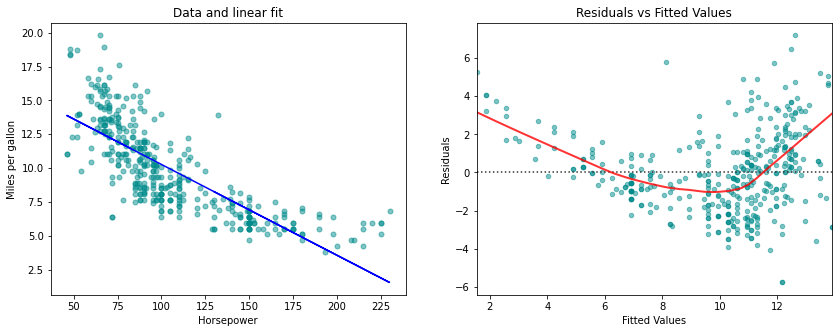

In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from matplotlib import pyplot as plt

# Load data
df = pd.read_csv(
    'Multiple Linear Regression/data/Auto.csv')

# Define the linear model:
x = df['horsepower']
y = df['mpg']

# Fit model
x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()

# Create figure:
fig = plt.figure(figsize=(14, 5))

# Plot left figure: Scatter data and linear fit
ax1 = fig.add_subplot(1, 2, 1)
# Scatter data
plt.plot(x, y, marker='o', linestyle='None',
         color='darkcyan', markersize='5', alpha=0.5,
         label="Scatter data")
# Linear fit
plt.plot(x, model.fittedvalues, 'b-', label="Linear fit")
# Set labels 
ax1.set_title('Data and linear fit')
ax1.set_xlabel('Horsepower')
ax1.set_ylabel('Miles per gallon')

# Plot right figure: Residuals vs fitted data
ax2 = fig.add_subplot(1, 2, 2)
# Residuals vs fitted value, using seaborn
ax2 = sns.residplot(
    x=model.fittedvalues, y=model.resid,  
    data=df, lowess=True, 
    scatter_kws={'color': 'darkcyan', 's': 20, 'alpha': 0.5},
    line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})
# Set labels 
ax2.set_title('Residuals vs Fitted Values')
ax2.set_ylabel('Residuals')
ax2.set_xlabel('Fitted Values')

# Show plot
plt.show()

A simple approach for incorporating non-linear associations in a linear model is to include transformed versions of the predictors in the model. For example, the points in the figure seem to have a *quadratic* shape, suggesting that a model of the form
\begin{equation*}
mpg = \beta_{0} + \beta_{1} \cdot horsepower + \beta_{2} \cdot horsepower^{2}+\epsilon
\end{equation*}

may provide a better fit. The equation involves predicting **mpg** using a non-linear function of **horsepower**. 

*But it is still a linear model!*

That is, the current model is simply a multiple linear regression model with
\begin{equation*}
X_{1}=horsepower 
\qquad\text{and}\qquad  
X_{2}=horsepower^{2}
\end{equation*}

So we can use standard linear regression software to estimate $\beta_{0}$, 
$\beta_{1}$, and $\beta_{2}$ in order to produce a non-linear fit. 

In [2]:
# Define the linear model:
x = pd.DataFrame({
    'horsepower' : df['horsepower'], 
    'horsepower^2' : (df['horsepower'] * df['horsepower'])})
y = df['mpg']

# Fit model
x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()

# Print summary:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           5.40e-99
Time:                        08:18:46   Log-Likelihood:                -797.76
No. Observations:                 392   AIC:                             1602.
Df Residuals:                     389   BIC:                             1613.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           24.1825      0.765     31.604   

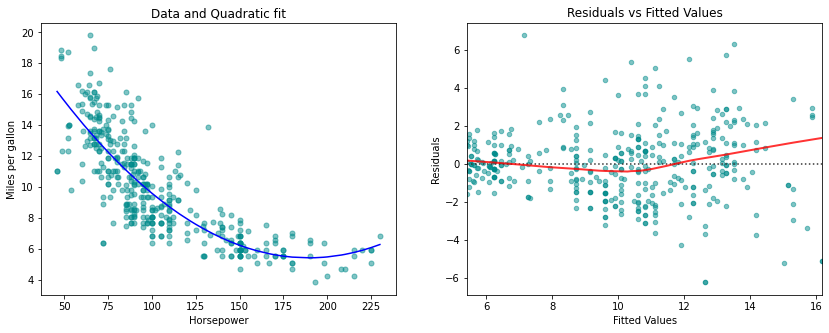

In [3]:
# Create figure:
fig = plt.figure(figsize=(14, 5))

# Plot left figure: Scatter data and linear fit
ax1 = fig.add_subplot(1, 2, 1)
# Scatter data
plt.plot(x['horsepower'], y, marker='o', linestyle='None',
         color='darkcyan', markersize='5', alpha=0.5,
         label="Scatter data")
# Quadratic fit
x_quad_fit = x.sort_values(by='horsepower')
y_quad_fit = (model.params['const'] 
              + x_quad_fit['horsepower'] * model.params['horsepower']
              + x_quad_fit['horsepower^2'] * model.params['horsepower^2'])
plt.plot(x_quad_fit['horsepower'], y_quad_fit, 
         'b-', label="Quadratic fit")
# Set labels 
ax1.set_title('Data and Quadratic fit')
ax1.set_xlabel('Horsepower')
ax1.set_ylabel('Miles per gallon')

# Plot right figure: Residuals vs fitted data
ax2 = fig.add_subplot(1, 2, 2)
# Residuals vs fitted value, using seaborn
ax2 = sns.residplot(
    x=model.fittedvalues, y=model.resid,  
    data=df, lowess=True, 
    scatter_kws={'color': 'darkcyan', 's': 20, 'alpha': 0.5},
    line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})
# Set labels 
ax2.set_title('Residuals vs Fitted Values')
ax2.set_ylabel('Residuals')
ax2.set_xlabel('Fitted Values')

# Show plot
plt.show()

The blue curve shows the resulting quadratic fit to the data. The quadratic fit appears to be substantially better than the fit obtained before, where just the linear term is included. The $ R^{2} $ of the quadratic fit is $ 0.688 $, compared to $ 0.606 $ for the linear fit, and the p-value for the quadratic term is highly significant.

Let us as well perform an ANOVA-analysis 


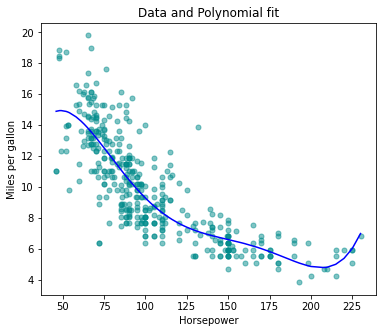

In [4]:
# Define the linear model:
x = pd.DataFrame({
    'horsepower' : df['horsepower'], 
    'horsepower^2' : (df['horsepower'] * df['horsepower']), 
    'horsepower^3' : (df['horsepower'] ** 3), 
    'horsepower^4' : (df['horsepower'] ** 4), 
    'horsepower^5' : (df['horsepower'] ** 5), 
    })
y = df['mpg']

# Fit model
x_sm = sm.add_constant(x)
model =sm.OLS(y, x_sm).fit()

# Print summary:
# print(model.summary())
# Create figure:
fig = plt.figure(figsize=(6, 5))

# Plot left figure: Scatter data and polynomial fit
ax1 = fig.add_subplot(1, 1, 1)
# Scatter data
plt.plot(x['horsepower'], y, marker='o', linestyle='None',
         color='darkcyan', markersize='5', alpha=0.5,
         label="Scatter data")
# Polynomial fit
x_quad_fit = x.sort_values(by='horsepower')
y_quad_fit = (model.params['const'] 
              + x_quad_fit['horsepower'] * model.params['horsepower']
              + x_quad_fit['horsepower^2'] * model.params['horsepower^2']
              + x_quad_fit['horsepower^3'] * model.params['horsepower^3'] 
              + x_quad_fit['horsepower^4'] * model.params['horsepower^4'] 
              + x_quad_fit['horsepower^5'] * model.params['horsepower^5'])

plt.plot(x_quad_fit['horsepower'], y_quad_fit, 
         'b-', label="Polynomial fit")
# Set labels 
ax1.set_title('Data and Polynomial fit')
ax1.set_xlabel('Horsepower')
ax1.set_ylabel('Miles per gallon')

# Show plot
plt.show()

The p-value for the null hypothesis, $\beta_2=0$, is approximately zero. We thus reject the null hypothesis and conclude that including the quadratic term in the regression model is essential for fitting an appropriate model to the data.

If including $horsepower^{2}$ led to such a big improvement in the model, why not include $horsepower^{3}$, $horsepower^{4}$ or even $horsepower^{5}$? The  Figure displays the fit that results from including all polynomials up to fifth degree in the model. The resulting fit seems unnecessarily wiggly - that is, it is unclear that including the additional terms really has led to a better fit to the data.

The approach that we have just described for extending the linear model to accomodate non-linear relationships is known as *polynomial regression*, since we have included polynomial functions of the predictors in the regression model. 

### Example Multiple Linear Regression 4.14

Let us consider the following model
\begin{equation*}
sales
=\beta_{0}+\beta_{1}\cdot radio +\beta_{2}\cdot newspaper +\epsilon
\end{equation*} 
and the model that includes as well the interaction term $TV\cdot radio$
\begin{equation*}
sales
=\beta_{0}+\beta_{1}\cdot TV +\beta_{2}\cdot radio +\beta_{3}\cdot TV \cdot radio +\epsilon
\end{equation*}

We have omitted the predictor **newspaper**, since we came to the conclusion that **newspaper** is not relevant to predict  **sales**.

The figure displays the Tukey-Anscombe plots for these two models. The right-hand panel displays the Tukey-Anscombe plot for the model where the interaction term $TV \cdot radio$ is included, in the left-hand panel the Tukey-Anscombe plot for the model without interaction term is shown. We observe that there is a clear improvement of the smoothing curve, when the interaction term is included in the model. 

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt

# Load data
df = pd.read_csv('Multiple Linear Regression/data/Advertising.csv')

# Define the linear models:
x_plain = pd.DataFrame({
    'TV' : df['TV'],
    'radio' : df['radio']})
x_inter = pd.DataFrame({
    'TV' : df['TV'],
    'radio' : df['radio'],
    'TV*radio' : df['TV'] * df['radio']})
y = df['sales']

# Fit models
# Plain model
x_plain_sm = sm.add_constant(x_plain)
model_plain = sm.OLS(y, x_plain_sm).fit()

# Model including interaction term
x_inter_sm = sm.add_constant(x_inter)
model_inter = sm.OLS(y, x_inter_sm).fit()

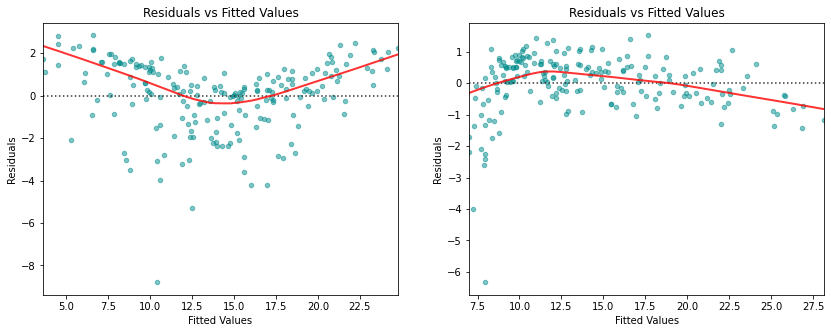

In [2]:
# Create figure:
fig = plt.figure(figsize=(14, 5))

# Plot left figure: Residuals vs fitted data
ax1 = fig.add_subplot(1, 2, 1)
# Scatter data
ax1 = sns.residplot(
    x=model_plain.fittedvalues, y=model_plain.resid,  
    data=df, lowess=True, 
    scatter_kws={'color': 'darkcyan', 's': 20, 'alpha': 0.5},
    line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})
# Set labels 
ax1.set_title('Residuals vs Fitted Values')
ax1.set_ylabel('Residuals')
ax1.set_xlabel('Fitted Values')

# Plot left figure: Residuals vs fitted data
ax1 = fig.add_subplot(1, 2, 2)
# Scatter data
ax2 = sns.residplot(
    x=model_inter.fittedvalues, y=model_inter.resid,  
    data=df, lowess=True, 
    scatter_kws={'color': 'darkcyan', 's': 20, 'alpha': 0.5},
    line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})
# Set labels 
ax2.set_title('Residuals vs Fitted Values')
ax2.set_ylabel('Residuals')
ax2.set_xlabel('Fitted Values')

# Show plot
plt.show()

In the right-hand panel the scale-location plot for the model considering the interaction term $TV \cdot radio$ is displayed, the left-hand panel displays the scale-location plot for the model without interaction term.  We observe again an improvement of the smoothing curve in the sense that including the interaction term leads to a rather constant smoother. 

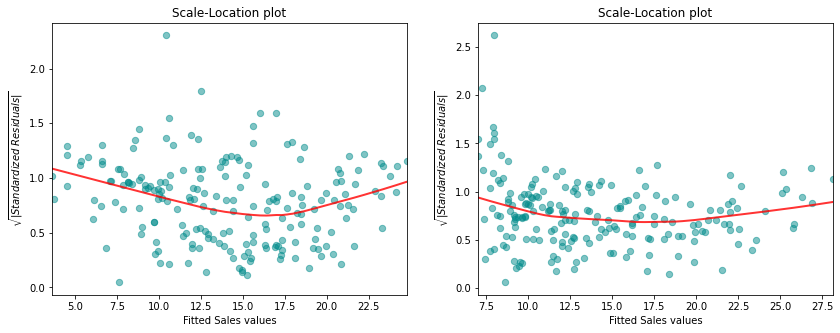

In [4]:
import numpy as np

# Residuals of the model
res_plain = model_plain.resid
res_inter = model_inter.resid
# Influence of the Residuals
res_inf_plain = model_plain.get_influence()
res_inf_inter = model_inter.get_influence()
# Studentized residuals using variance from OLS
res_standard_plain = res_inf_plain.resid_studentized_internal
res_standard_inter = res_inf_inter.resid_studentized_internal
# Absolute square root Residuals:
res_stand_sqrt_plain = np.sqrt(np.abs(res_standard_plain))
res_stand_sqrt_inter = np.sqrt(np.abs(res_standard_inter))

# Create figure:
fig = plt.figure(figsize=(14, 5))

# Plot left figure: Residuals vs fitted data
ax1 = fig.add_subplot(1, 2, 1)
# plot Regression usung Seaborn
sns.regplot(x=model_plain.fittedvalues, y=res_stand_sqrt_plain, 
            scatter=True, ci=False, lowess=True, 
            scatter_kws={'color': 'darkcyan', 's': 40, 'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})
ax1.set_title('Scale-Location plot')
ax1.set_xlabel('Fitted Sales values')
ax1.set_ylabel('$\sqrt{\|Standardized\ Residuals\|}$')

# Plot left figure: Residuals vs fitted data
ax2 = fig.add_subplot(1, 2, 2)
# plot Regression usung Seaborn
sns.regplot(x=model_inter.fittedvalues, y=res_stand_sqrt_inter, 
            scatter=True, ci=False, lowess=True, 
            scatter_kws={'color': 'darkcyan', 's': 40, 'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})
ax2.set_title('Scale-Location plot')
ax2.set_xlabel('Fitted Sales values')
ax2.set_ylabel('$\sqrt{\|Standardized\ Residuals\|}$')

# Show plot
plt.show()

On the basis of the residual plots, we therefore conclude that the model including the interaction term fits the data better. There is however an aspect of the residual analysis for the model including the interaction term that seems problematic: the outlying observations 131 und 156. 

The next figure plots for every observation the leverage statistic $h_i$ versus the standardized residual $\tilde{r}_i$. In multiple regression, the values of the levarage statistic $h_i$ are defined as diagonal elements $H_{ii}$ of the $n\times n$ *hat matrix* $H$. The hat matrix is defined as
\begin{equation*}
H=X(X^{T}X)^{-1}X^{T}
\end{equation*}

where $X$ denotes the $n\times (p+1)$ data matrix composed of $n$ measurements, of $p$ features, and of ones in the first column. The expected value of the leverage statistic is given by 
\begin{equation*}
(p + 1) / n
\end{equation*}

where $p$ denotes the number of predictor variables and $ n $ is the number of data points. So if a given observation has a leverage statistic that greatly exceeds the expected value, that is
\begin{equation*}
h_i>>\frac{(p+1)}{n}
\end{equation*}
then we may suspect that the corresponding point has *high leverage*. In the previous example of the **Advertising** data for the model including the interaction term, we have $ p=3 $ and $ n=200 $. Thus, a value of the leverage statistic exceeding $ 4/200=0.02 $ should attract our attention.

In order to have a *dangerous* influence on the regression model, an observation needs to have as well a large absolute value of the residual. In simple linear regression analysis, Cook's distance is a function of the leverage statistic $ h_{i} $ and of the standardized residual $ \tilde{r}_i $. In multiple regression, Cook's distance is defined as
\begin{equation*}
d_i=\frac{H_{ii}}{1-H_{ii}}\frac{\tilde{r}_i^2}{p+1}
\end{equation*}

where $H_{ii}$ denotes the diagonal elements of the hat matrix $H$. 

The next figure displays the contour lines for the function values $ 1 $, $ 0.5 $, and $0.1$ of Cook's distance. Observations with a Cook's distance larger than $ 1 $ must be considered as dangerous.

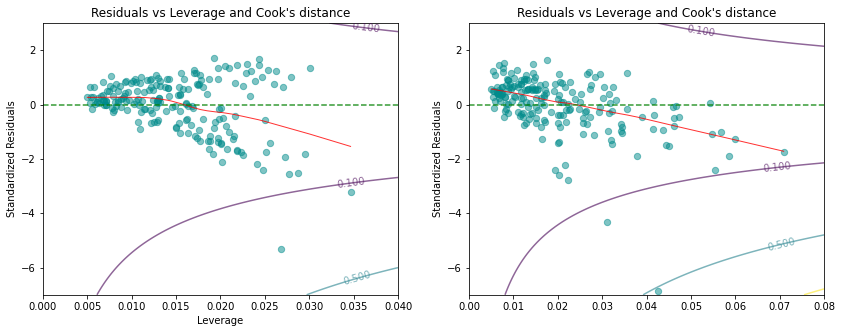

In [5]:
# Cook's Distance and leverage:
res_inf_cooks_plain = res_inf_plain.cooks_distance
res_inf_cooks_inter = res_inf_inter.cooks_distance
res_inf_leverage_plain = res_inf_plain.hat_matrix_diag
res_inf_leverage_inter = res_inf_inter.hat_matrix_diag

# Contour levels for Cook's distance 
n = 100   # Grid dimensions
n_pred_plain = x_plain.shape[1]
n_pred_inter = x_inter.shape[1]
xmin, ymin, ymax = 0, -7, 3  # Grid boundaries
xmax_plain, xmax_inter = 0.04, 0.08
cooks_distance_plain = np.zeros((n, n))
cooks_distance_inter = np.zeros((n, n))
# Create grid
y_cooks = np.linspace(ymin, ymax, n)
x_cooks_plain = np.linspace(xmin, xmax_plain, n)
x_cooks_inter = np.linspace(xmin, xmax_inter, n)

for xi in range(n):
    for yi in range(n):
        cooks_distance_plain[yi][xi] = (
            y_cooks[yi]**2 * x_cooks_plain[xi] /
            (1 - x_cooks_plain[xi]) / (n_pred_plain + 1))
        cooks_distance_inter[yi][xi] = (
            y_cooks[yi]**2 * x_cooks_inter[xi] / 
            (1 - x_cooks_inter[xi]) / (n_pred_inter + 1))
# Create figure:
fig = plt.figure(figsize=(14, 5))

# Plot left figure: Cook's distance
ax1 = fig.add_subplot(1, 2, 1)
# ax1.set_xlim(0, 0.04)
# Plot standardized Residuals
sns.regplot(x=res_inf_leverage_plain, y=res_standard_plain, 
            scatter=True, ci=False, lowess=True, 
            scatter_kws={'color': 'darkcyan', 's': 40, 'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
# Plot centre line
plt.plot((xmin, xmax_plain), (0, 0), 'g--', alpha=0.8)
# Plot Cook's Distance
CS = ax1.contour(x_cooks_plain, y_cooks, cooks_distance_plain, 
                 levels=[0.1, 0.5, 1], alpha=0.6)
# labels and title
ax1.clabel(CS, inline=0,  fontsize=10)
ax1.set_title('Residuals vs Leverage and Cook\'s distance')
ax1.set_xlabel('Leverage')
ax1.set_ylabel('Standardized Residuals')

# Plot left figure: Cook's distance
ax2 = fig.add_subplot(1, 2, 2)
# Plot Regression using Seaborn
sns.regplot(x=res_inf_leverage_inter, y=res_standard_inter, 
            scatter=True, ci=False, lowess=True, 
            scatter_kws={'color': 'darkcyan', 's': 40, 'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
# Plot centre line
plt.plot((xmin, xmax_inter), (0, 0), 'g--', alpha=0.8)
# Plot Cook's Distance
CS = ax2.contour(x_cooks_inter, y_cooks, cooks_distance_inter, 
                 levels=[0.1, 0.5, 1], alpha=0.6)
# labels and title
ax2.clabel(CS, inline=0,  fontsize=10)
ax2.set_title('Residuals vs Leverage and Cook\'s distance')
# ax2.set_xlabel('Leverage')
ax2.set_ylabel('Standardized Residuals')

# Show plot
plt.show()

Based on the plots we conclude that observations 156 and 131 are *not* dangerous.

### Example Multiple Linear Regression 4.17

The following **Python**-output displays the correlation matrix for the **Credit** data set. 

In [1]:
import pandas as pd

# Load data
df = pd.read_csv('Multiple Linear Regression/data/Credit.csv')

# Drop all quantitative columns
df = df.drop(['Unnamed: 0','Gender','Student','Married','Ethnicity'], 
             axis=1)

# Find the correlation Matrix using DataFrame.corr()
print(round(df.corr(), 4))

           Income   Limit  Rating   Cards     Age  Education  Balance
Income     1.0000  0.7921  0.7914 -0.0183  0.1753    -0.0277   0.4637
Limit      0.7921  1.0000  0.9969  0.0102  0.1009    -0.0235   0.8617
Rating     0.7914  0.9969  1.0000  0.0532  0.1032    -0.0301   0.8636
Cards     -0.0183  0.0102  0.0532  1.0000  0.0429    -0.0511   0.0865
Age        0.1753  0.1009  0.1032  0.0429  1.0000     0.0036   0.0018
Education -0.0277 -0.0235 -0.0301 -0.0511  0.0036     1.0000  -0.0081
Balance    0.4637  0.8617  0.8636  0.0865  0.0018    -0.0081   1.0000


From the **Python**-output we read off that the  correlation coefficient between **limit** and **age** is $ 0.101 $ which corresponds to a rather weak correlation. On the other hand, we find for the correlation between **limit** and **rating** a value of $ 0.997 $ which is very large. 

### Example Multiple Linear Regression 4.18

In the **Credit** data, a regression of **balance** on **age**, **rating**, and **limit** indicates that the predictors have VIF values of 1.01, 160.67, and 160.59. As we suspected, there is considerable collinearity in the data.


In [6]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
    
# Define the linear model:
x = pd.DataFrame({
    'Age' : df['Age'], 
    'Rating' : df['Rating'],
    'Limit' : df['Limit']})
y = df['Balance']

# VIF Analysis
x_c = sm.add_constant(x)
VIF  = []
for i in range(1,4):
    VIF.append(variance_inflation_factor(x_c.to_numpy(), i))
    
print(list(x.columns), '\n', np.round(VIF, 3))

# R Squared for 'complete' system
# Fit models
x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()

print('\nRsquared for the complete model is given by:\n', 
      np.round(model.rsquared, 4))

['Age', 'Rating', 'Limit'] 
 [  1.011 160.668 160.593]

Rsquared for the complete model is given by:
 0.7536


### Example Multiple Linear Regression 4.19

When faced with the problem of collinearity, there are two simple solutions. The first is to drop one of the problematic variables from the regression. This can usually be done without much compromise to the regression fit, since the presence of collinearity implies that the information that this variable provides about the response is redundant in the presence of the other variables. 

For instance, if we regress **balance** onto **age** and **limit**, without the **rating** predictor, then the resulting VIF values are close to the minimum possible value of 1, and the $ R^2 $ drops from 0.754 to 0.75. 

In [4]:
# Define the linear model:
x = x.drop('Rating', axis=1, errors='ignore')

# Fit models
model = sm.OLS(y, x_sm).fit()

# Print result
print('\n Rsquared without \'Rating\' is given by:\n', 
      np.round(model.rsquared, 4))


 Rsquared without 'Rating' is given by:
 0.7536


So dropping **rating** from the set of predictors has effectively solved the collinearity problem without compromosing  the fit. 


### Example Multiple Linear Regression 5.1

We now return to the seven questions about the **Advertising** data that we set out to answer. To this goal, we have again a look at the **Python**-output  of example 3.1. 


In [1]:
import pandas as pd
import statsmodels.api as sm

# Load data
df = pd.read_csv('Multiple Linear Regression/data/Advertising.csv')
x = df[['TV', 'radio', 'newspaper']]
y = df['sales']

# Fit Model:
x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()

# Print summary including F-Statistic
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           1.58e-96
Time:                        13:56:31   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

The Fitted Parameters and their confidence interval is given by:

In [2]:
# Print Model parameters
print(model.conf_int(alpha=0.05, cols=None))

                  0         1
const      2.323762  3.554016
TV         0.043014  0.048516
radio      0.171547  0.205513
newspaper -0.012616  0.010541


In [5]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF Analysis
x_c = sm.add_constant(x)
VIF  = []
for i in range(1,4):
    VIF.append(variance_inflation_factor(x_c.to_numpy(), i))
    
print(list(x.columns), '\n', np.round(VIF, 3))

['TV', 'radio', 'newspaper'] 
 [1.005 1.145 1.145]
